In [1]:
import pandas as pd
import math
import numpy as np
import sklearn
from scipy import stats
from statsmodels.stats.outliers_influence import summary_table
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=pd.read_csv("^GSPC.csv", parse_dates=True)["Open"]
y=pd.read_csv("KO1.csv", parse_dates=True)["Open"]

In [3]:
x.head()

0    1171.229980
1    1188.579956
2    1087.300049
3    1031.099976
4    1107.530029
Name: Open, dtype: float64

In [4]:
x.describe()

count     121.000000
mean     2008.226021
std       601.172559
min      1031.099976
25%      1412.199951
50%      2018.209961
75%      2476.959961
max      3244.669922
Name: Open, dtype: float64

In [5]:
y.head()

0    27.680000
1    26.855000
2    25.559999
3    25.150000
4    27.910000
Name: Open, dtype: float64

In [6]:
y.describe()

count    121.000000
mean      41.050868
std        6.469166
min       25.150000
25%       37.880001
50%       41.500000
75%       44.599998
max       58.750000
Name: Open, dtype: float64

In [7]:
x=x.values.reshape(-1, 1)

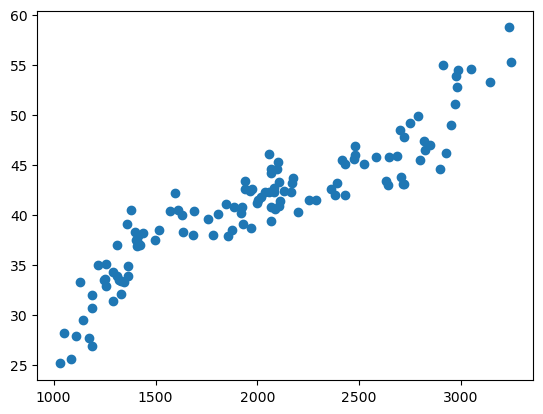

In [8]:
plt.scatter(x,y)

(A) Використовуючи комп'ютерне програмне забезпечення для виконання регресійних розрахунків 
𝑥 = 𝑟𝑚,  𝑦 = 𝑟𝑝 
оцініть за допомогою регресії параметри 𝑏0 і 𝑏1, 𝑏2 для компанії. 

In [9]:
from sklearn.preprocessing import PolynomialFeatures 
import statsmodels.api as sm
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(x) 
poly.fit(X_poly, y) 
X = sm.add_constant(X_poly) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
b0,b1,b2=model.params

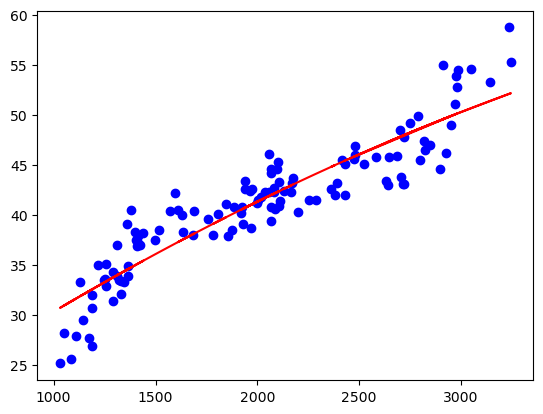

In [10]:
plt.scatter(x, y, color = 'blue') 
y_pred=b0+b1*x+b2*x*x
plt.plot(x,y_pred, color = 'red') 
plt.show() 

(B) Зробіть повний характеристичний аналіз для моделі

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Open   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     310.1
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.04e-47
Time:                        21:59:15   Log-Likelihood:                -286.17
No. Observations:                 121   AIC:                             578.3
Df Residuals:                     118   BIC:                             586.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.3041      2.848      6.076      0.000      11.664      22.944
x1             0.0140      0.003      4.829      0.000       0.008       0.020
x2         -1.017e-06   6.98e-07     -1.458      0.147    -2.4e-06    3.64e-07
==============================================================================
Omnibus:                        0.158   Durbin-Watson:                   0.365
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.329
Skew:                          -0.033   Prob(JB):                        0.848
Kurtosis:                       2.753   Cond. No.                     6.07e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(C) Побудувати довірчий діапазон для регресійних значень 𝑦 ̂ (з рівнем довіри 95%);

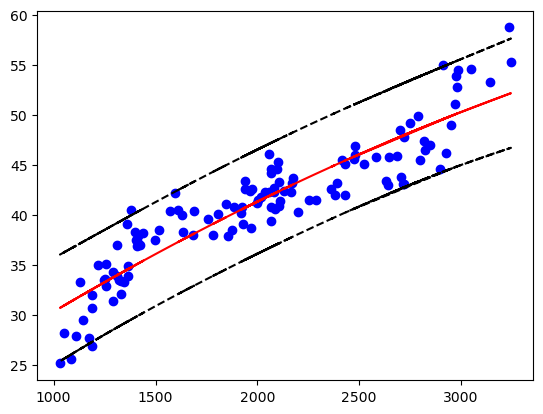

In [12]:
st, data, ss2 = summary_table(model, alpha=0.05)
fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T
plt.scatter(x, y, marker = "o", color = "blue")
plt.plot(x, y_pred, color = "red")
plt.plot(x, predict_ci_low, color = "black",linestyle = "--")
plt.plot(x, predict_ci_upp, color = "black",linestyle = "--")
plt.show()

(D) Зробіть прогноз на наступний місяць, якщо ринок підніметься на 20% від попереднього місяця. 

In [13]:
x_last=x[-1]*1.2
y_next_month=b0+b1*x_last+b2*x_last*x_last
print("Predicted: "+str(y_next_month))

Predicted: [49.64056467]
